In [ ]:
Learnings:
    1. Complete EDA with Conclusion.
    2. Count Plot - Bar Plot.
    3. KDE Chart with two variables.
    4. Histogram with KDE plot.

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn import metrics
from sklearn.metrics import confusion_matrix
import seaborn as sns
%matplotlib inline
import warnings
import xgboost as xgb
from sklearn.metrics import classification_report
warnings.filterwarnings('ignore')
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [2]:
df = pd.read_csv("C:\\Users\\30093514\\Downloads\\HR_Employee_Attrition_Data.csv")

In [3]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [4]:
df.head(2)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7


In [5]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


### In Overall data maybe Monthly Income had some outliers -Let's take a look into this

In [6]:
outlier = df['MonthlyIncome'].sub(df['MonthlyIncome'].mean()).div(df['MonthlyIncome'].std()).abs().ge(3)
outlier_df = df[outlier]

In [7]:
outlier_df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager


### There is no outlier's as per z score method

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [9]:
df.isna().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

### I can't see any Null values in the data.

## Check Unique value in Object Type format

In [10]:
#categorical_variable_list = df.select_dtypes('object').columns.to_list()
categorical_variable_list = df.columns.to_list()
for vari in categorical_variable_list:
    print("Value in "+vari)
    print(df[vari].unique())
    print("="*70)

Value in Age
[41 49 37 33 27 32 59 30 38 36 35 29 31 34 28 22 53 24 21 42 44 46 39 43
 50 26 48 55 45 56 23 51 40 54 58 20 25 19 57 52 47 18 60]
Value in Attrition
['Yes' 'No']
Value in BusinessTravel
['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
Value in DailyRate
[1102  279 1373 1392  591 1005 1324 1358  216 1299  809  153  670 1346
  103 1389  334 1123 1219  371  673 1218  419  391  699 1282 1125  691
  477  705  924 1459  125  895  813 1273  869  890  852 1141  464 1240
 1357  994  721 1360 1065  408 1211 1229  626 1434 1488 1097 1443  515
  853 1142  655 1115  427  653  989 1435 1223  836 1195 1339  664  318
 1225 1328 1082  548  132  746  776  193  397  945 1214  111  573 1153
 1400  541  432  288  669  530  632 1334  638 1093 1217 1353  120  682
  489  807  827  871  665 1040 1420  240 1280  534 1456  658  142 1127
 1031 1189 1354 1467  922  394 1312  750  441  684  249  841  147  528
  594  470  957  542  802 1355 1150 1329  959 1033 1316  364  438  689
  201 1427  857  93

# All the Object type variable is Categorical

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [12]:
df.kurt()

Age                        -0.404145
DailyRate                  -1.203823
DistanceFromHome           -0.224833
Education                  -0.559115
EmployeeCount               0.000000
EmployeeNumber             -1.223179
EnvironmentSatisfaction    -1.202521
HourlyRate                 -1.196398
JobInvolvement              0.270999
JobLevel                    0.399152
JobSatisfaction            -1.222193
MonthlyIncome               1.005233
MonthlyRate                -1.214956
NumCompaniesWorked          0.010214
PercentSalaryHike          -0.300598
PerformanceRating           1.695939
RelationshipSatisfaction   -1.184814
StandardHours               0.000000
StockOptionLevel            0.364634
TotalWorkingYears           0.918270
TrainingTimesLastYear       0.494993
WorkLifeBalance             0.419460
YearsAtCompany              3.935509
YearsInCurrentRole          0.477421
YearsSinceLastPromotion     3.612673
YearsWithCurrManager        0.171058
dtype: float64

In [13]:
df.skew()

Age                         0.413286
DailyRate                  -0.003519
DistanceFromHome            0.958118
Education                  -0.289681
EmployeeCount               0.000000
EmployeeNumber              0.016574
EnvironmentSatisfaction    -0.321654
HourlyRate                 -0.032311
JobInvolvement             -0.498419
JobLevel                    1.025401
JobSatisfaction            -0.329672
MonthlyIncome               1.369817
MonthlyRate                 0.018578
NumCompaniesWorked          1.026471
PercentSalaryHike           0.821128
PerformanceRating           1.921883
RelationshipSatisfaction   -0.302828
StandardHours               0.000000
StockOptionLevel            0.968980
TotalWorkingYears           1.117172
TrainingTimesLastYear       0.553124
WorkLifeBalance            -0.552480
YearsAtCompany              1.764529
YearsInCurrentRole          0.917363
YearsSinceLastPromotion     1.984290
YearsWithCurrManager        0.833451
dtype: float64

# I deleted "StandardHours" and "EmployeeCount" as skewness and Kutosis is zero because there is only one unique value.

# I deleted "EmployeeNumber" because it is unique for each datapoint.

In [14]:
df = df.drop(["EmployeeCount","StandardHours","EmployeeNumber"],axis=1)

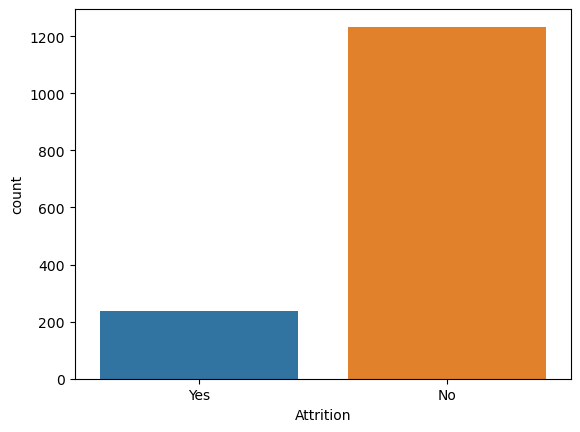

In [15]:
sns.countplot(x ='Attrition', data = df)
plt.show()

### Observation 1:  Data is Imbalanced around 84% and 16%  .I will do outlier treatment later

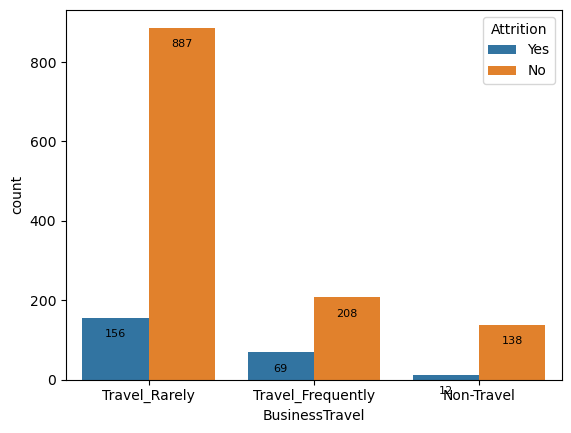

In [16]:
ax=sns.countplot(x ='BusinessTravel', data = df,hue="Attrition")
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', va='top', color='black', size=8)

### Observation 2:  If a person is Non-Travel, Chances of iteration is very very low than 'Travel_Rarely' and 'Travel_Frequently'

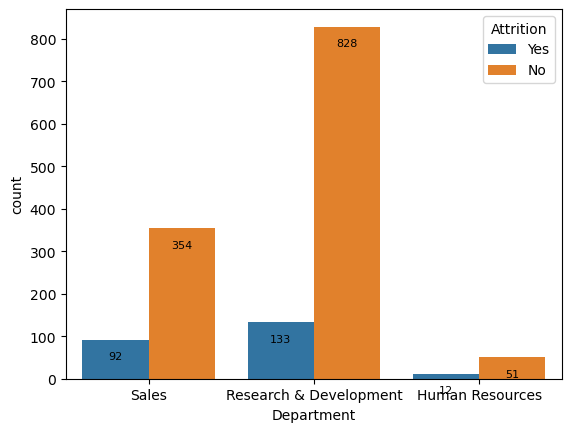

In [17]:
ax=sns.countplot(x ='Department', data = df,hue="Attrition")
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', va='top', color='black', size=8)

### Observation 3:  Attrition rate in Human Resource is very low while in Rearch and Development Department is very high.

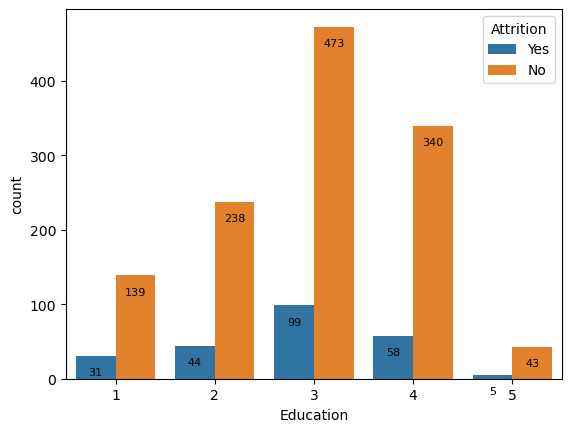

In [18]:
ax=sns.countplot(x ='Education', data = df,hue="Attrition");
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', va='top', color='black', size=8)

### Observation 4:  Attrition rate with "Education" Category 5 is very less around 1 in 9.

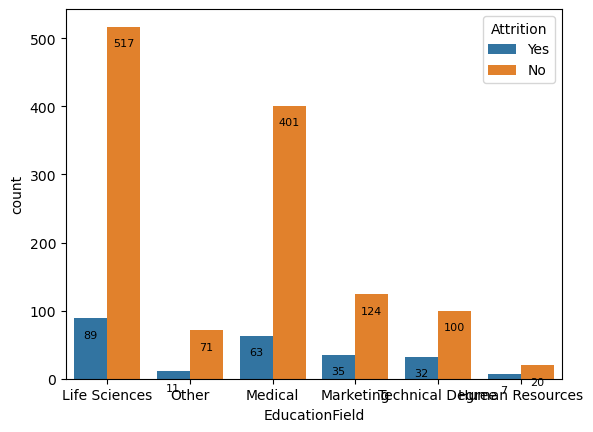

In [19]:
ax=sns.countplot(x ='EducationField', data = df,hue="Attrition");
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', va='top', color='black', size=8)

### Observation 5:  Attrition rate with "Other" Category is very less around 1 in 7.

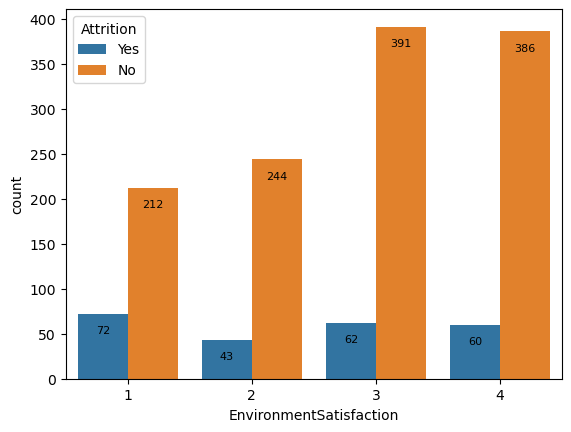

In [20]:
ax=sns.countplot(x ='EnvironmentSatisfaction', data = df,hue="Attrition");
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', va='top', color='black', size=8)

### Observation 6:  Attrition rate with "1" Category in EnvromentSatisfaction is very High around 1:3.

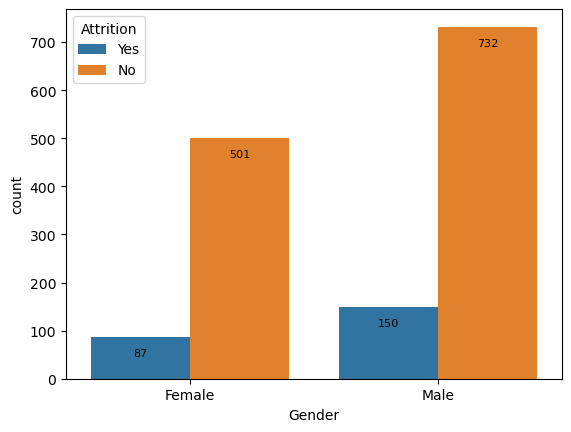

In [21]:
ax=sns.countplot(x ='Gender', data = df,hue="Attrition");
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', va='top', color='black', size=8)

### Observation 7:  Attrition rate on Male and Female is almost equal

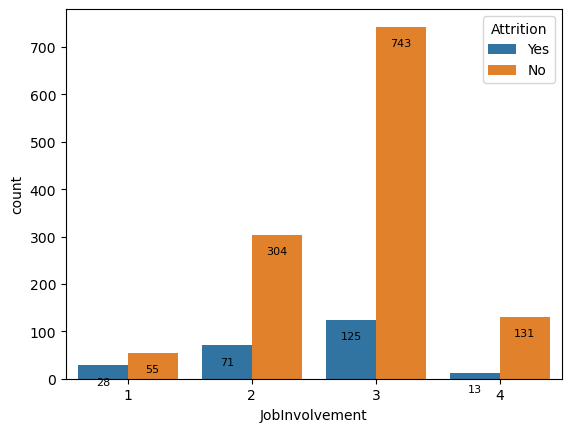

In [22]:
ax=sns.countplot(x ='JobInvolvement', data = df,hue="Attrition");
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', va='top', color='black', size=8)

### Observation 8:  Attrition rate with JobInvolvement Category 4 is very less around 1:10.

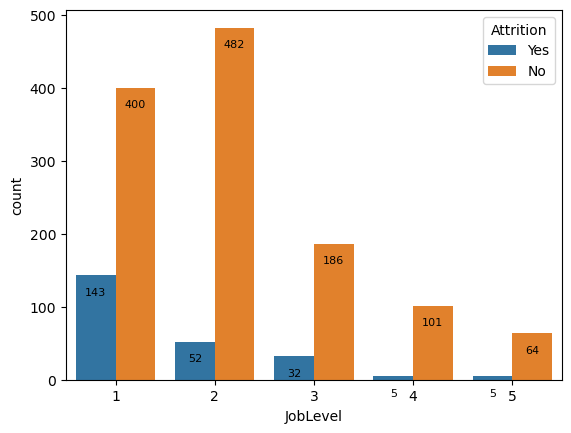

In [23]:
ax=sns.countplot(x ='JobLevel', data = df,hue="Attrition");
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', va='top', color='black', size=8)

### Observation 9:  Attrition rate with JobInvolvement Category 4 is very less around 1:20.

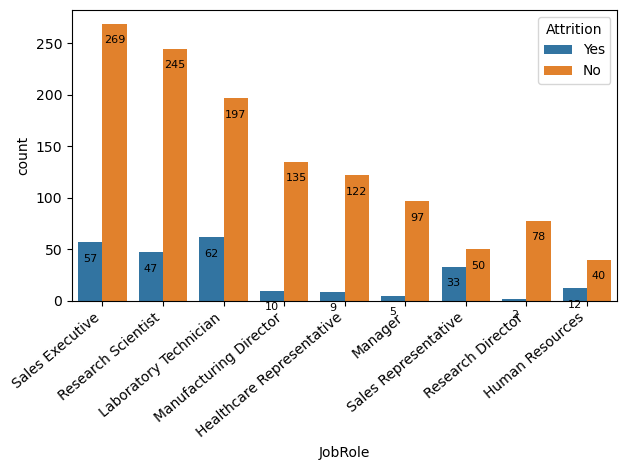

In [24]:
ax=sns.countplot(x ='JobRole', data = df,hue="Attrition");

for p in ax.patches:
    ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', va='top', color='black', size=8)
plt.tight_layout()
plt.show()

### Observation 10:  Attrition rate with "Research Director" JobRole  is very less around 1:39.

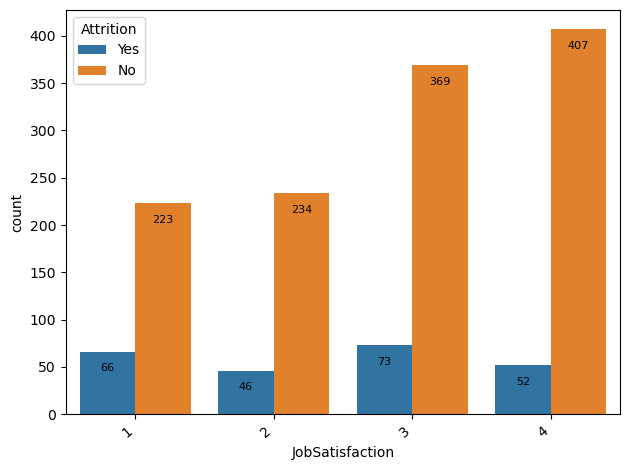

In [25]:
ax=sns.countplot(x ='JobSatisfaction', data = df,hue="Attrition");

for p in ax.patches:
    ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', va='top', color='black', size=8)
plt.tight_layout()
plt.show()

### Observation 11:  Attrition rate is almost same in each category

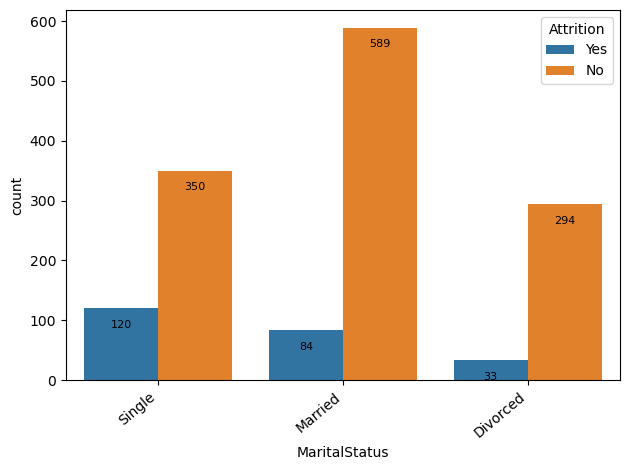

In [26]:
ax=sns.countplot(x ='MaritalStatus', data = df,hue="Attrition");

for p in ax.patches:
    ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', va='top', color='black', size=8)
plt.tight_layout()
plt.show()

### Observation 12:  Attrition rate in Single is much higher.

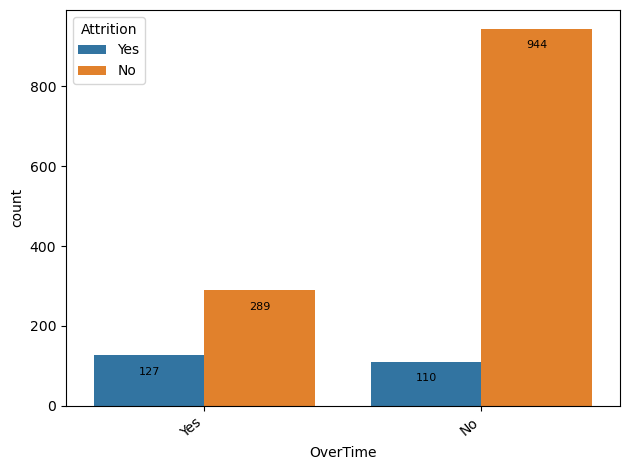

In [27]:
ax=sns.countplot(x ='OverTime', data = df,hue="Attrition");

for p in ax.patches:
    ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', va='top', color='black', size=8)
plt.tight_layout()
plt.show()

### Observation 13:  Attrition rate when OverTime is "Yes" is very high..

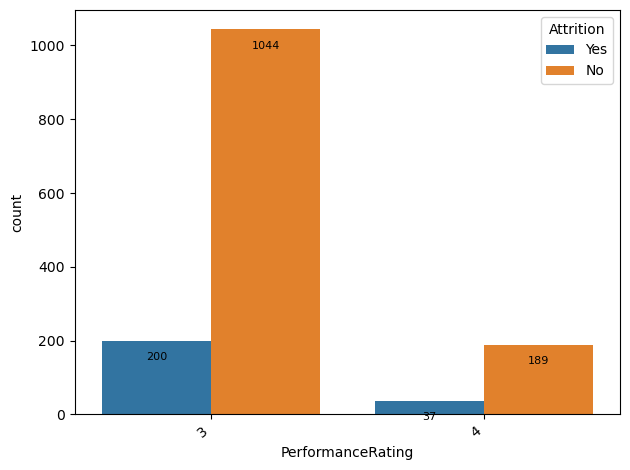

In [28]:
ax=sns.countplot(x ='PerformanceRating', data = df,hue="Attrition");

for p in ax.patches:
    ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', va='top', color='black', size=8)
plt.tight_layout()
plt.show()

### Observation 14:  Attrition rate is almost same in each PerformanceRating category

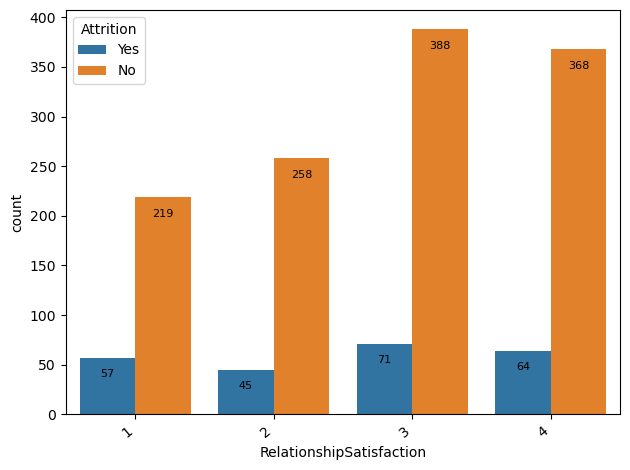

In [29]:
ax=sns.countplot(x ='RelationshipSatisfaction', data = df,hue="Attrition");

for p in ax.patches:
    ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', va='top', color='black', size=8)
plt.tight_layout()
plt.show()

### Observation 15:  Attrition rate is almost same in each RelationshipSatisfaction category

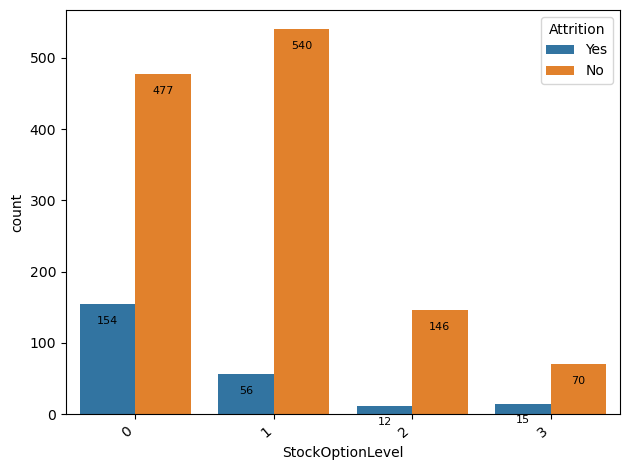

In [30]:
ax=sns.countplot(x ='StockOptionLevel', data = df,hue="Attrition");

for p in ax.patches:
    ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', va='top', color='black', size=8)
plt.tight_layout()
plt.show()

### Observation 16:  Attrition rate in StockOptionLevel "2" is very low and "0" is very high

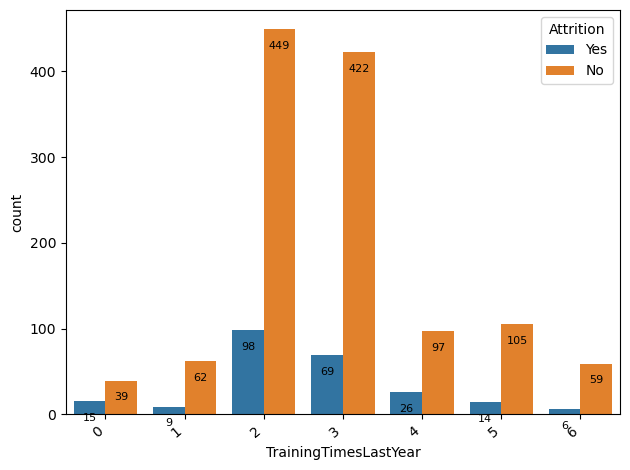

In [31]:
ax=sns.countplot(x ='TrainingTimesLastYear', data = df,hue="Attrition");

for p in ax.patches:
    ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', va='top', color='black', size=8)
plt.tight_layout()
plt.show()

### Observation 17:  Attrition rate in TrainingTimesLastYear "6" is very high

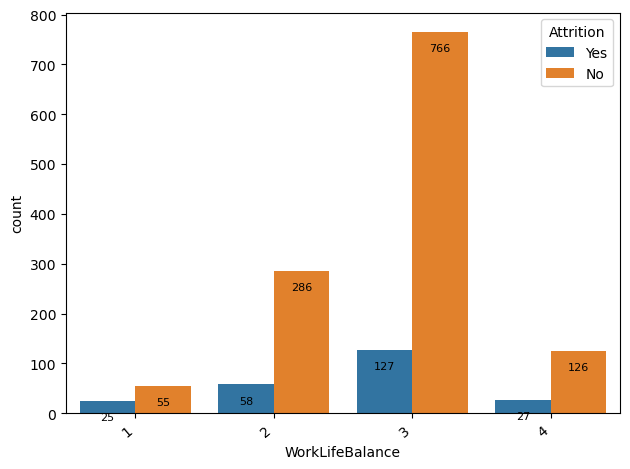

In [32]:
ax=sns.countplot(x ='WorkLifeBalance', data = df,hue="Attrition");

for p in ax.patches:
    ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', va='top', color='black', size=8)
plt.tight_layout()
plt.show()

### Observation 18:  Attrition rate in Worklife Balance "1" is very high

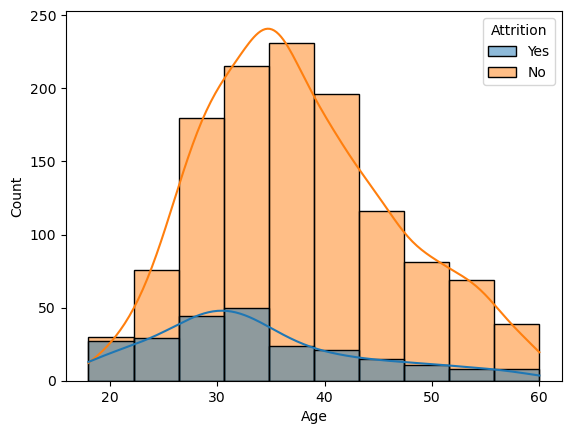

In [33]:
sns.histplot(data=df, x="Age", hue="Attrition" ,kde=True,bins=10)
plt.show()

### Observation 19:  Attrition rate is high for Age 25 to 35.

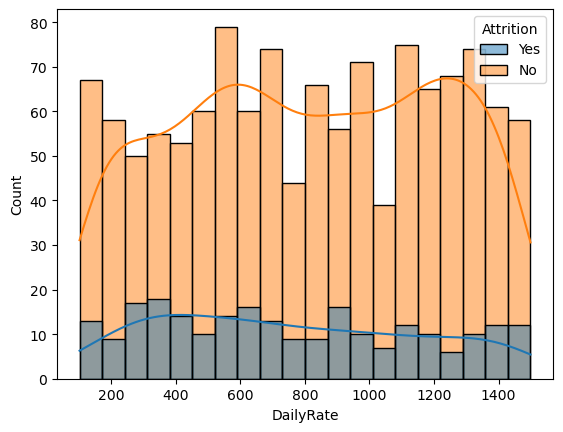

In [34]:
sns.histplot(data=df, x="DailyRate", hue="Attrition" ,kde=True,bins=20)
plt.show()

### Observation 20:  No such information is extracted from this variable

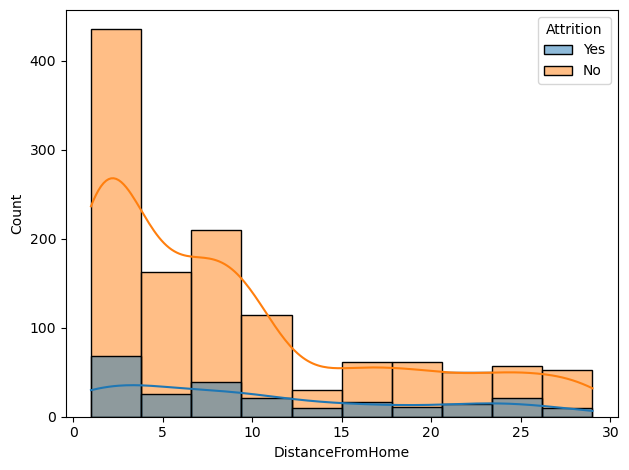

In [35]:
sns.histplot(data=df, x="DistanceFromHome", hue="Attrition" ,kde=True,bins=10)
for p in ax.patches:
    ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', va='top', color='black', size=8)
plt.tight_layout()
plt.show()

### Observation 21:  Data is tightly right skewed

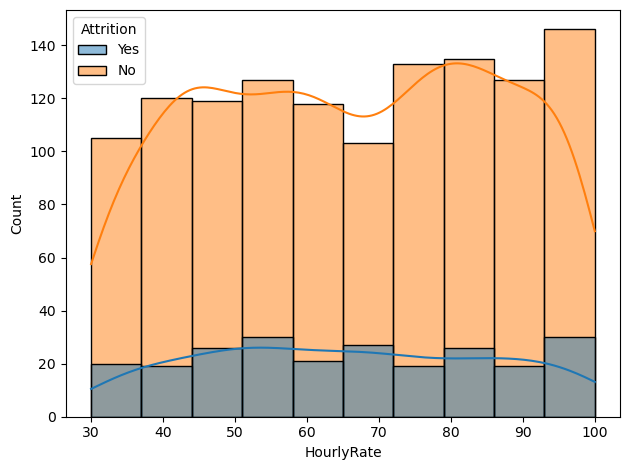

In [36]:
sns.histplot(data=df, x="HourlyRate", hue="Attrition" ,kde=True,bins=10)
for p in ax.patches:
    ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', va='top', color='black', size=8)
plt.tight_layout()
plt.show()

### Observation 22:  Data is not distributed normally. Need to change this to Normal Distribution.

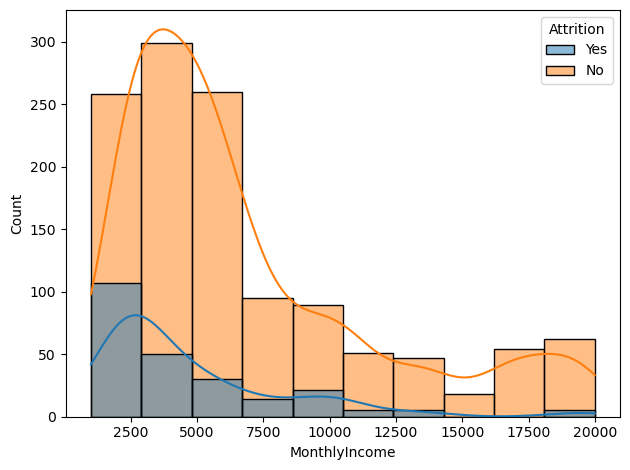

In [37]:
sns.histplot(data=df, x="MonthlyIncome", hue="Attrition" ,kde=True,bins=10)
for p in ax.patches:
    ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', va='top', color='black', size=8)
plt.tight_layout()
plt.show()

### Observation 23:  Low salary's have higher attrition rate

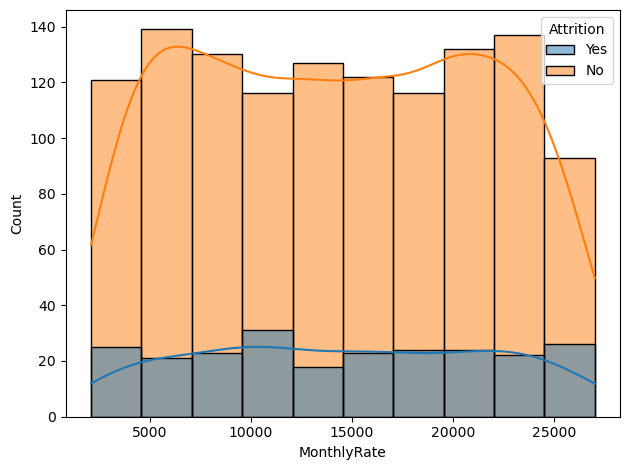

In [38]:
sns.histplot(data=df, x="MonthlyRate", hue="Attrition" ,kde=True,bins=10)
for p in ax.patches:
    ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', va='top', color='black', size=8)
plt.tight_layout()
plt.show()

### Observation 24:  No such information is extracted from this variable

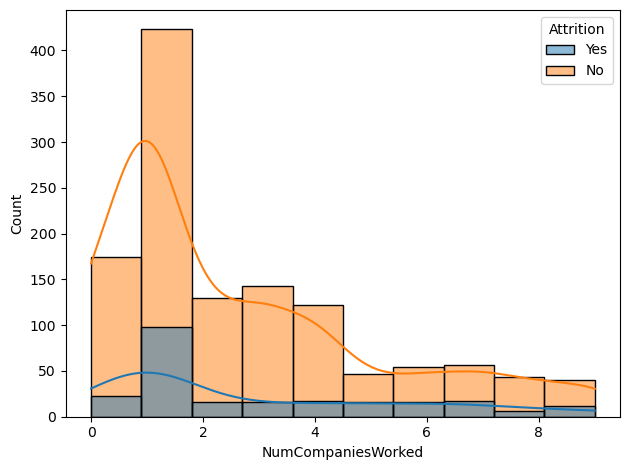

In [39]:
sns.histplot(data=df, x="NumCompaniesWorked", hue="Attrition" ,kde=True,bins=10)
for p in ax.patches:
    ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', va='top', color='black', size=8)
plt.tight_layout()
plt.show()

### Observation 25: Person who have worked with 0 to 3 companies have higher attrition rate

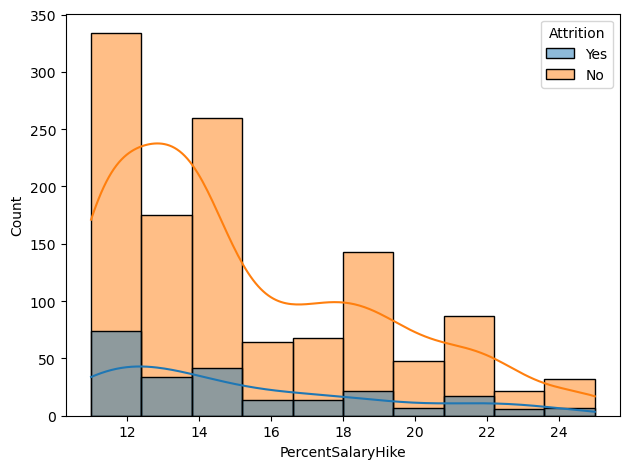

In [40]:
sns.histplot(data=df, x="PercentSalaryHike", hue="Attrition" ,kde=True,bins=10)
for p in ax.patches:
    ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', va='top', color='black', size=8)
plt.tight_layout()
plt.show()

### Observation 26:  Person who have less than 14% hike,have higher attrition rate

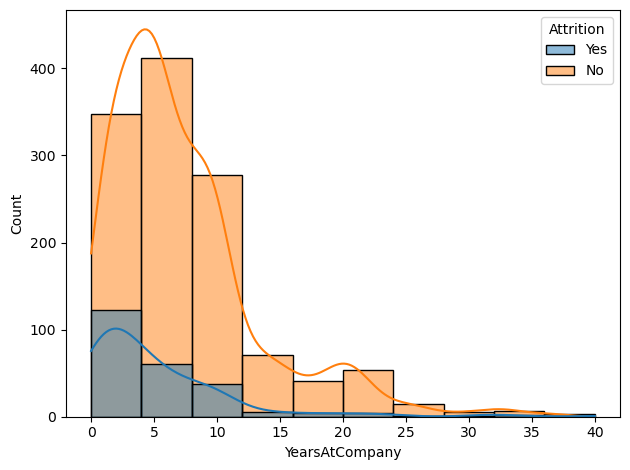

In [41]:
sns.histplot(data=df, x="YearsAtCompany", hue="Attrition" ,kde=True,bins=10)
for p in ax.patches:
    ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', va='top', color='black', size=8)
plt.tight_layout()
plt.show()

### Observation 27: Person who have spent less than 5 years in the organization have higher attrition rate.

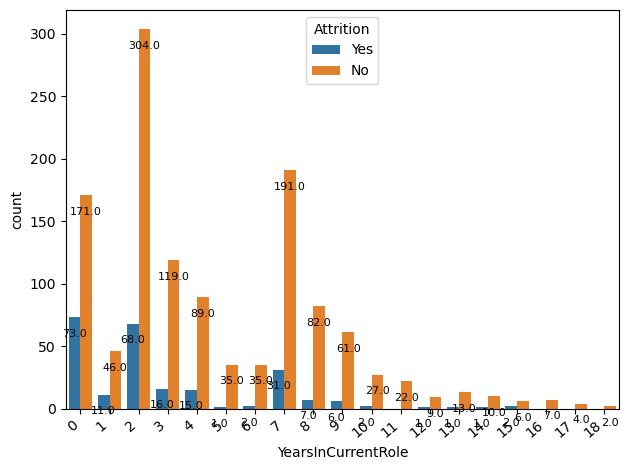

In [74]:
ax=sns.countplot(x ='YearsInCurrentRole', data = df,hue="Attrition");

for p in ax.patches:
    ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', va='top', color='black', size=8)
plt.tight_layout()
plt.show()

### Observation 28:  Person who spent less than 1 year with CurrentRole, Attrition rate is high.

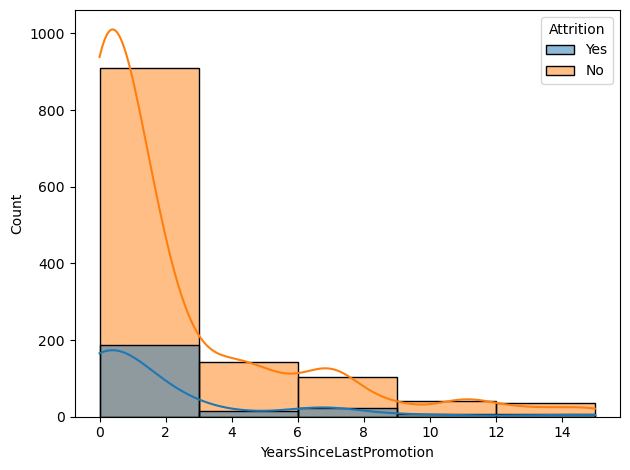

In [43]:
sns.histplot(data=df, x="YearsSinceLastPromotion", hue="Attrition" ,kde=True,bins=5)
for p in ax.patches:
    ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', va='top', color='black', size=8)
plt.tight_layout()
plt.show()

### Observation 29:  Person who have less than 4 years since last promotion have higher attrition rate

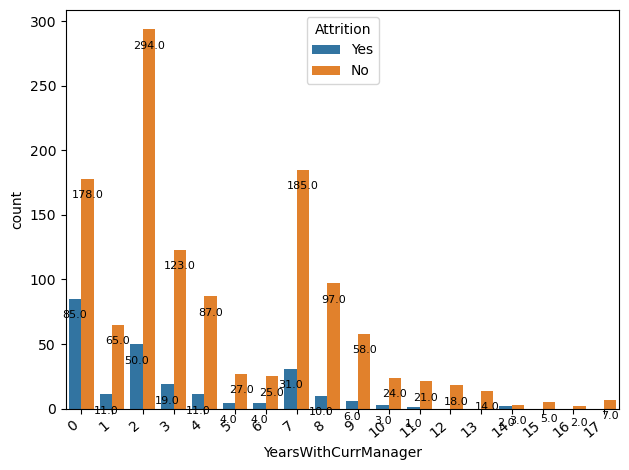

In [75]:

ax=sns.countplot(x ='YearsWithCurrManager', data = df,hue="Attrition");

for p in ax.patches:
    ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', va='top', color='black', size=8)
plt.tight_layout()
plt.show()

### Observation 30:  Person who spent less than 1 year with Current Manager, Attrition rate is high.

All Observations:-
1. Data is Imbalanced around 84% and 16%  .I will do outlier treatment later.
2. If a person is Non-Travel, Chances of iteration is very very low than 'Travel_Rarely' and 'Travel_Frequently'.
3. Attrition rate in Human Resource is very low while in Rearch and Development Department is very high.
4. Attrition rate with "Education" Category is very less around 1 in 9.
5. Attrition rate with "Other" Category is very less around 1 in 7.
6. Attrition rate with "1" Category in EnvromentSatisfaction is very less around 1:3.
7. Attrition rate on Male and Female is almost equal.
8. Attrition rate with JobInvolvement Category 4 is very less around 1:10.
9. Attrition rate with JobInvolvement Category 4 is very less around 1:20.
10. Attrition rate with "Research Director" JobRole  is very less around 1:39.
11. Attrition rate is almost same in each category.
12. Attrition rate in Single is much higher.
13. Attrition rate when OverTime is "Yes" is very high..
14. Attrition rate is almost same in each PerformanceRating category.
15. Attrition rate is almost same in each RelationshipSatisfaction category.
16. Attrition rate in StockOptionLevel "2" is very low and "0" is very high.
17. Attrition rate in TrainingTimesLastYear "6" is very high
18. Attrition rate in Worklife Balance "1" is very high.
19. Attrition rate is high for Age 25 to 35.
20. No such information is extracted from this variable.
21. Data is tightly right skewed.
22. Data is not distributed normally. Need to change this to Normal Distribution.
23. Low salary's have higher attrition rate.
24. No such information is extracted from this variable.
25. Person who have worked with 0 to 3 companies have higher attrition rate.
26. Person who have less than 14% hike,have higher attrition rate
27. Person who have spent less than 5 years in the organization have higher attrition rate.
28. Person who spent less than 1 year with CurrentRole, Attrition rate is high
29. Person who have less than 4 years since last promotion have higher attrition rate
30. Person who spent less than 1 year with Current Manager, Attrition rate is high

# 

# 

# 

# 

# 

# 

# 

# 

### Observation 19:  Attrition rate in TrainingTimesLastYear "6" is very high

# 

# 

# 

# 

# 

# 

# 

# 

In [ ]:
#Check Skewness and Kurtosis of the whole data
continousVariableList = df.select_dtypes('int64').columns.to_list()
for variable in continousVariableList:
    sns.displot(data=df, x=variable, kind="kde",hue='Attrition')
    plt.show()
    print("Skewness of "+variable+" is: "+str(df[variable].skew()))
    print("Kurtosis of "+variable+" is: "+str(df[variable].kurt()))
    print("="*70)

In [ ]:
SubPlot
GroupBy
Pi-Plot
Bar Plot - Numerical/Categorical


In [ ]:
sns.pairplot(df,hue ='Attrition',diag_kind='kde',markers=["o", "s"])
plt.show()

In [ ]:
plt.figure(figsize=(25,15))
dataplot = sns.heatmap(df.corr(),annot=True)
plt.show()

In [ ]:
corr_matrix = df.corr()

In [ ]:
upper=corr_matrix.where(np.triu(np.ones(corr_matrix.shape),k=1).astype(bool))
neg_corr=[column for column in upper.columns if any(upper[column]<=-0.70)]
pos_corr=[column for column in upper.columns if any(upper[column]>=0.70)]

In [ ]:
total_corr=neg_corr+pos_corr

In [ ]:
total_corr

In [ ]:
# Drop EmployeeNumber column because it is unique for each record
df = df.drop(["EmployeeNumber"],axis=1)

In [ ]:
df["Attrition"] = np.where(df["Attrition"] == "Yes", 1, 0)

## Do Label Encoding for Categorical DataType

In [ ]:
label_encoder = preprocessing.LabelEncoder()
df['BusinessTravel']= label_encoder.fit_transform(df['BusinessTravel'])
df['Department']= label_encoder.fit_transform(df['Department'])
df['EducationField']= label_encoder.fit_transform(df['EducationField'])
df['JobRole']= label_encoder.fit_transform(df['JobRole'])
df['MaritalStatus']= label_encoder.fit_transform(df['MaritalStatus'])
df['OverTime']= label_encoder.fit_transform(df['OverTime'])
df['Over18']= label_encoder.fit_transform(df['Over18'])
df['Gender']= label_encoder.fit_transform(df['Gender'])
